# 20-05-02: Daily Data Practice

---

### Daily Practices

* Meta Data: Review and write
  * Focus on a topic, review notes and resources, write a blog post about it
* HackerRank SQL or Packt SQL Data Analytics
* Practice with the common DS/ML tools and processes
  * Try to hit benchmark accuracies with [UCI ML datasets](https://archive.ics.uci.edu/ml/index.php)
  * Hands-on ML with sklearn, Keras, and TensorFlow
    * Read, code along, take notes
    * _test yourself on the concepts_ — i.e. do all the chapter exercises
  * [fast.ai course](https://course.fast.ai/)
  * Kaggle
* Interviewing
  * "Tell me a bit about yourself"
  * "Tell me about a project you've worked on and are proud of"
  * Business case walk-throughs
  * Hot-seat DS-related topics for recall practice (under pressure)
* Job sourcing
  * LinkedIn

---

### DS + ML Practice

* Pick a dataset and try to do X with it
  * Try to hit benchmark accuracies with [UCI ML datasets](https://archive.ics.uci.edu/ml/index.php)
  * Kaggle
* Practice with the common DS/ML tools and processes
  * Hands-on ML with sklearn, Keras, and TensorFlow
  * Machine learning flashcards

#### _The goal is to be comfortable explaining the entire process._

* Data access / sourcing, cleaning
  * SQL
  * Pandas
  * Exploratory data analysis
  * Data wrangling techniques and processes
* Inference
  * Statistics
  * Probability
  * Visualization
* Modeling
  * Implement + justify choice of model / algorithm
  * Track performance + justify choice of metrics
    * Communicate results as relevant to the goal

## Chapter 2: End-to-End Project

The book uses census data to build/train a model for predicting district housing prices. This is not all that exciting to me, so I may choose another dataset to use while working along in the book.

I think the [Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset) should do nicely.

Here are the general steps to follow in an end-to-end project:

1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insights
4. Prepare the data for ML algorithms
5. Select a model and train it
6. Fine-tune the model
7. Present the solution
8. Launch, monitor, and maintain the system

### The Big Picture

The Business Case / Objective: Predict the number of users of bike sharing services.

#### The Data

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
+ Target(s)
  - casual: count of casual users
  - registered: count of registered users
  - cnt: count of total rental bikes including both casual and registered 

### Load, explore, and prepare data

In [10]:
# === Imports === #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# === ML Imports === #
from sklearn.model_selection import train_test_split

In [2]:
# === Load the data === #
data_path = "data/Bike-Sharing-Dataset/hour.csv"
bikes = pd.read_csv(data_path)

In [3]:
# === First looks === #
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# === Convert dteday to datetime === #
bikes["dteday"] = pd.to_datetime(bikes["dteday"])

In [7]:
# === Data types === #
bikes.dtypes

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [9]:
# === Basic stats === #
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


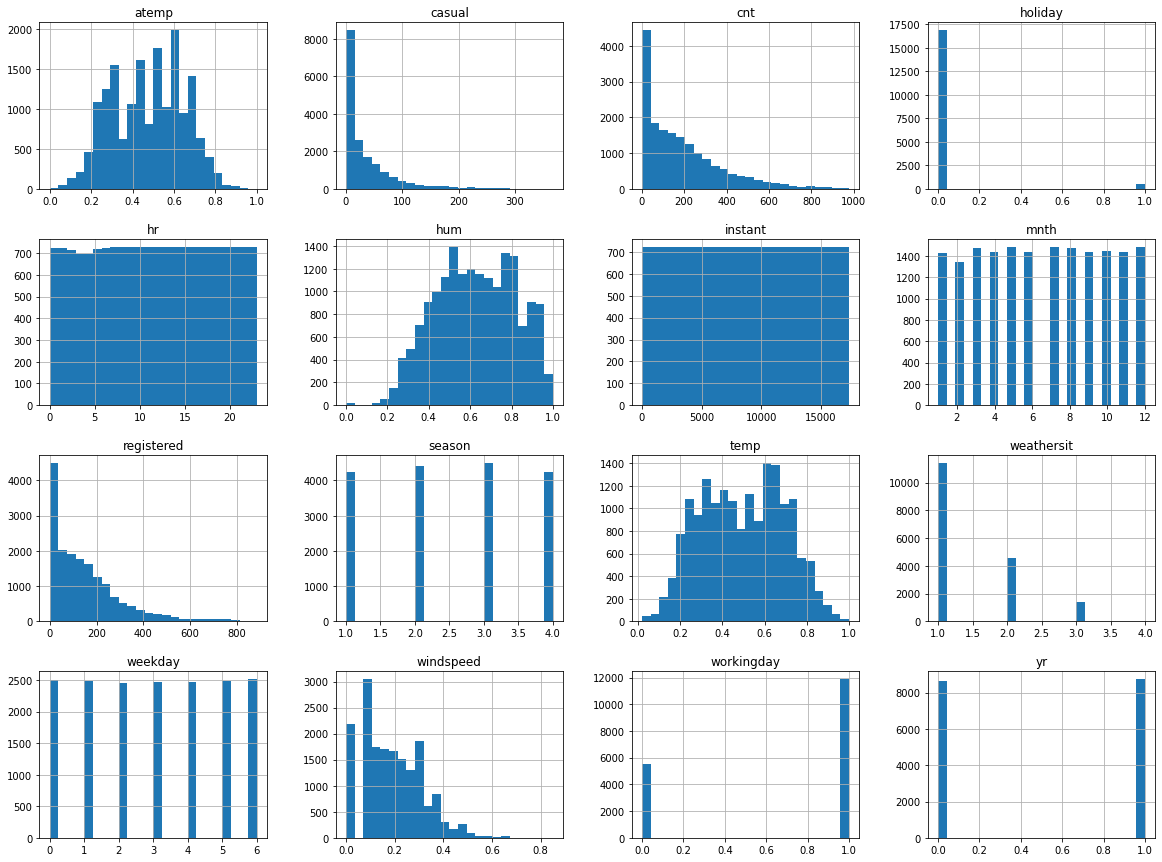

In [13]:
# === Basic visualizations === #
# Provides a general overview of the distribution of the attributes
bikes.hist(bins=24, figsize=(20,15));

### Split data into train/test

In [ ]:
# === Define custom split function === #
# Note that this will create a different test set every time...
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

bike_train, bike_test = split_train_test(bikes, 0.2)

In [19]:
# === Use sklearn to split === #
from sklearn.model_selection import train_test_split

# Not stratified this time
bike_train, bike_test = train_test_split(bikes, test_size=0.2, random_state=92)

len(bike_train), len(bike_test)

(13903, 3476)

### Discover and visualize the data to gain insights

In [20]:
# === Copy the training data === #
bike = bike_train.copy()
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6285,6286,2011-09-24,4,0,9,11,0,6,0,2,0.62,0.5758,0.83,0.0896,118,268,386
11998,11999,2012-05-20,2,1,5,3,0,0,0,1,0.54,0.5152,0.56,0.0896,26,40,66
483,484,2011-01-22,1,0,1,4,0,6,0,2,0.02,0.0152,0.48,0.2985,0,3,3
7360,7361,2011-11-08,4,0,11,7,0,2,1,1,0.30,0.3182,0.87,0.1045,7,316,323
4463,4464,2011-07-09,3,0,7,21,0,6,0,1,0.74,0.6818,0.58,0.1642,83,155,238


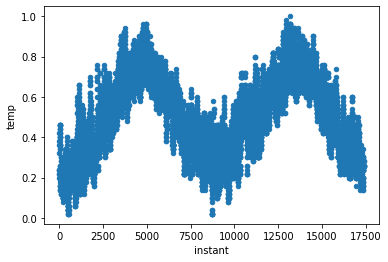

In [25]:
# Not really useful, but wanted to plot something anyways
bike.plot(kind="scatter", x="instant", y="temp");

In [26]:
# === Calculating correlations === #
corr_matrix = bike.corr()

corr_matrix["cnt"].sort_values(ascending=False)

cnt           1.000000
registered    0.971884
casual        0.699694
temp          0.406904
atemp         0.402673
hr            0.394987
instant       0.286171
yr            0.256631
season        0.183558
mnth          0.125397
windspeed     0.095891
weekday       0.028684
workingday    0.023333
holiday      -0.031792
weathersit   -0.145474
hum          -0.323538
Name: cnt, dtype: float64

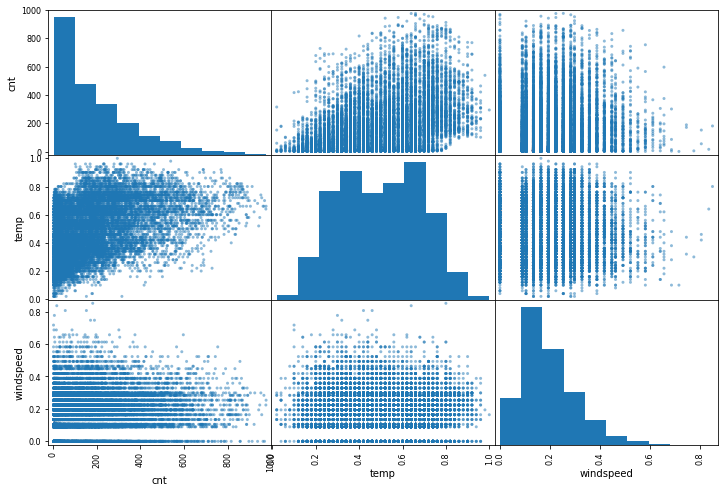

In [32]:
# === Scatter matrix === #
from pandas.plotting import scatter_matrix

attributes = [
    "cnt",
    "temp",
    "windspeed",
]

scatter_matrix(bike[attributes], figsize=(12, 8));

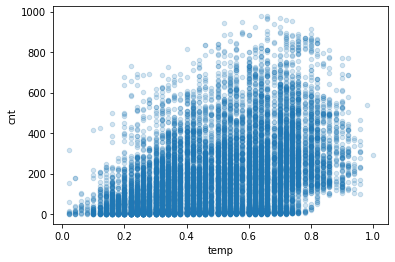

In [36]:
# === Zoom in on temperature / cnt === #
bike.plot(kind="scatter", x="temp", y="cnt", alpha=0.2);

There seems to be a generally positive relationship between temperature and number of users.

The opposite seems to be true for windspeed.

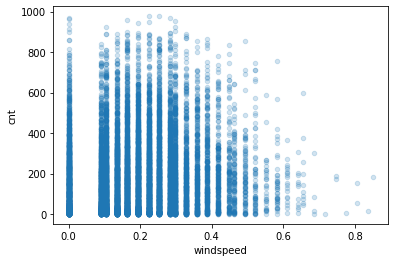

In [37]:
# === Zoom in on windspeed / cnt === #
bike.plot(kind="scatter", x="windspeed", y="cnt", alpha=0.2);

---

### Writing

> Focus on a topic or project, learn/review the concepts, and write a blog post about it



---

### SQL

> Work through practice problems on HackerRank or Packt

---

### Interviewing

> Practice answering the most common interview questions

* "Tell me a bit about yourself"
* "Tell me about a project you've worked on and are proud of"
* Business case walk-throughs
* Hot-seat DS-related topics for recall practice (under pressure)

---

### Job sourcing

> Browse LinkedIn, Indeed, and connections for promising leads